# Project objective
This project is designed to review logistic regression method and its python implementation using Wisconsin breast cancer dataset. Performance of the modeling will be assessed using k-fold cross validation for different k values.

Information about the dataset, some technical details about the used machine learning method(s) and mathematical details of the quantifications approaches are provided in the code. 

# Packages we work with in this notebook
We are going to use the following libraries and packages:

* **numpy**: NumPy is the fundamental package for scientific computing with Python. (http://www.numpy.org/)
* **sklearn**: Scikit-learn is a machine learning library for Python programming language. (https://scikit-learn.org/stable/)

We also use **warnings** to stop the notebook from returning warning messages.


In [0]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Introduction to the dataset

**Name**: Wisconsin breast cancer dataset

**Summary**: Identifying if there is a malignant tumor or not using features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

**number of features**: 30 (real, positive) 

**Number of data points (instances)**: 569

**dataset accessibility**: Dataset is available as part of sklearn package.

**Link to the dataset**: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)




## Loading the dataset and separating features and labels
The dataset is available as part of sklearn package. Hence, we do not need to import the data directly from UCI ML repository. 

In [2]:
from sklearn.datasets import load_breast_cancer

# Loading breast cancer data
target_dataset = load_breast_cancer()

# separating feature arrays of pixel values (X) and labels (y) 
input_features = target_dataset.data
output_var = target_dataset.target
# printing number of features (pixels) and data points 
n_samples, n_features = input_features.shape
print("number of samples (data points):", n_samples)
print("number of features:", n_features)

number of samples (data points): 569
number of features: 30


## Building the supervised learning model
We want to build a binary classification model as the output variable is categorical with 2 classes. Here we build a simple logistic regression model.

### Logistic regression
If we have set of features X1 to Xn, y can be obtained as:
\begin{equation*} y=b0+b1X1+b2X2+...+bnXn\end{equation*}

where y is the predicted value obtained by weighted sum of the feature values.

Then probability of each class (for example if there is a malignant tumor) can be obtained using the logistic function 

\begin{equation*} p(class=malignant)=\frac{1}{(1+exp(-y))} \end{equation*}

Based on the given class labels and the features given in the trainign data, coefficients b0 to bn can be ontained during the optimization process.

b0 to bn are fixed for all samples while X1 to Xn are feature values specific to each sample. Hence, the logistic function will give us probability of each class assigned to each sample. Finally, the model will choose the class with the highest probability for each sample.


**Note.** The logistic regression model is parametric and the parameters are the regression coefficiets b0 to bn.

## Evaluating performance of the model
We need to assess performance of the model using the predictions of the test set. We use accuracy and balanced accuracy. Here are their definitions:

* **accuracy**: This measure gives you a sense of performance for all the classes together as follows:

$$ {\displaystyle {\text{accuracy}}={\frac {tp+tn}{tp+tn+fp+fn}}\,}$$


\begin{equation*} accuracy=\frac{number\:of\:correct\:predictions}{(total\:number\:of\:data\:points (samples))} \end{equation*}

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 

# Create logistic regression object
logreg = LogisticRegression(random_state=10)

# assessing performance of the model using k-fold cross validation
scores = cross_val_score(logreg, input_features, output_var, cv=5)

# performance in each fold
print("Accuracies in each fold: \n" , scores)
# average performance across all folds
print("Average Accuracy across the folds: %0.2f" % (scores.mean()))

Accuracies in each fold: 
 [0.92982456 0.93859649 0.96491228 0.93859649 0.95575221]
Average Accuracy across the folds: 0.95


## Cross-validation and checking generalizability of the model
After training a machine learning model, we need to check its generalizability and making sure it is not just good in prediction of training set but is capable of predicting new data points. In previous projects we splitted the data to 2 parts, training and test set. We can go one step further and repeat this splitting across the dataset so that every single data point is considered in one of the test (better to be said validation) sets. This process is called k-fold cross-validation. For example in case of 5-fold cross-validation, the dataset is splitted to 5 chunks and the model is trained in 4 out of 5 chunk and tested on the remianing chunk. The test chunk is then rotated so taht every chunk is conisidered once for testing the model. Then we can get average performance of the model in the tested chunks.

Now we can implement the same modeling using different k values and compare them.

Note. Lack (or low level) of generalizability of a trained model to new data points is called overfitting.

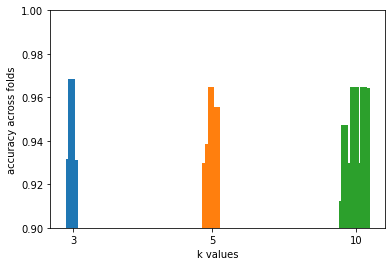

In [4]:
def kCV(model, input_df, output, k):
  
  scores = []
  for k_iter in range(0,len(k)):
    scores.append(cross_val_score(model, input_features, output_var, cv=k[k_iter]))
    # barplot across different folds for each k value
    plt.bar(k_iter+1+np.arange(0,len(scores[-1]))/50,height = scores[-1], width = 0.05)

  # specifying parameters of the plot
  plt.ylim(0.9, 1)
  plt.ylabel("accuracy across folds")
  plt.xlabel("k values")
  plt.xticks([k_iter + 1 + k[k_iter]/100 for k_iter in range(0,len(k))], [str(k_iter) for k_iter in k])
  plt.show()

  # returning scores
  return scores

scores = kCV(model = logreg,
             input_df = input_features,
             output = output_var,
             k = [3, 5, 10])

Now we can check the average score across different folds for each k value. Although the average accuracies are very close in this case, it does not mean they will be close for all tasks. 

In [5]:
print('average accuracies across the folds for each k value: {}'.format([np.mean(score) for score in scores]))

average accuracies across the folds for each k value: [0.9437389770723104, 0.9455364073901569, 0.9437969924812031]
